2.a

The expoential family
$$P(y;\eta) = b(y)\exp(\eta^TT(y)-a(\eta)))$$

while
possion distribution:
$$P(y;\lambda) = \frac{e^{-\lambda}\lambda^y}{y!}$$

\begin{align*}
P(y;\lambda) &= \frac{e^{-\lambda}\lambda^y}{y!}
\\
&= \frac{1}{y!}\exp{(-\lambda+y\log{\lambda})}
\\
\end{align*}
hence
\begin{align*}
b(y) &= \frac{1}{y!}
\\
a(\eta) &= \lambda
\\
T(y) &= y
\\
\eta &= \log{\lambda}
\end{align*}

2.b

\begin{align*}
g(\eta) &= E[T(y);\eta]
\\
&= \lambda
\\
&= e^{\eta}
\\
&= e^{\theta^Tx}
\end{align*}

2.c

\begin{align*}
\log{p(y^{(i)}|x^{(i)};\theta)} &= -\lambda + y \log{\lambda} - \log{y!}
\\
\nabla_\theta(\log{p(y^{(i)}|x^{(i)};\theta)}) &= -\frac{\partial\lambda}{\partial\theta} +y^{(i)}\cdot\frac{\partial \log{\lambda}}{\partial\theta}
\\
&=x^{(i)}(y^{(i)}-\lambda)
\\
&=x^{(i)}(y^{(i)}-e^{\theta^Tx})
\end{align*}
then gradient ascent:
$$\theta = \theta+\alpha x^{(i)}(y^{(i)}-e^{\theta^Tx^{(i)}})$$

2.d

I couldn't come up with the integration trick.

see

https://github.com/zyxue/stanford-cs229/blob/master/Problem-set-1/2-Poisson-regression-and-the-exponential-family.ipynb

http://people.stat.sfu.ca/~raltman/stat402/402L6.pdf

if you wannna know more about Poisson Regression

http://data.princeton.edu/wws509/notes/c4.pdf


#  The experiment below is the end of the world remained to be saved.

In [1]:
import numpy as np
import pandas as pd
from urllib import request
from io import StringIO

In [42]:
response_x = request.urlopen('http://data.princeton.edu/wws509/datasets/ceb.dat')
data = response_x.read().decode('utf-8')

In [43]:
data = pd.read_csv(StringIO(data), sep='\s+',engine='python', header=0)

In [44]:
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
sns.set_style('white')

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


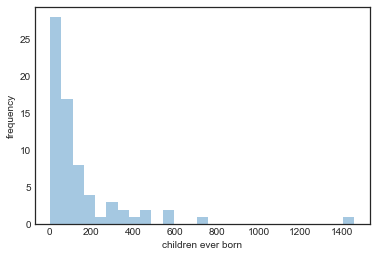

In [45]:
sns.distplot(data['y'], kde=False)
plt.xlabel('children ever born')
plt.ylabel('frequency')
plt.show()

In [93]:

# The cell number (1 to 71, cell 68 has no observations), 
# “dur” = marriage duration (1=0-4, 2=5-9, 3=10-14, 4=15-19, 5=20-24, 6=25-29), 
# “res” = residence (1=Suva, 2=Urban, 3=Rural), 
# “educ” = education (1=none, 2=lower primary, 3=upper primary, 4=secondary+), 
# “mean” = mean number of children ever born (e.g. 0.50), 
# “var” = variance of children ever born (e.g. 1.14), and 
# “n” = number of women in the cell (e.g. 8), 
# “y” = number of children ever born.

# data

In [47]:
def dur(x):
    table = {
        '0-4':1,
        '5-9':2,
        '10-14':3,
        '15-19':4,
        '20-24':5,
        '25-29':6
    }
    return table[x]
def res(x):
    table = {
        'Suva':1, 
        'urban':2,
        'rural':3
    }
    return table[x]
def educ(x):
    table = {
        'none':1,
        'lower':2,
        'upper':3,
        'sec+':4
    }
    return table[x]

In [48]:
# “dur” = marriage duration (1=0-4, 2=5-9, 3=10-14, 4=15-19, 5=20-24, 6=25-29), 
# “res” = residence (1=Suva, 2=Urban, 3=Rural), 
# “educ” = education (1=none, 2=lower primary, 3=upper primary, 4=secondary+), 
data.res = data.res.apply(res)
data.educ = data.educ.apply(educ)
data.dur = data.dur.apply(dur)

In [56]:
x = data.values[:,:3]

In [61]:
y = data.y.values

In [138]:
w = 2 * np.random.uniform(size=(3)) - 1

In [139]:
w

array([ 0.92548544, -0.08437465, -0.83928428])

In [140]:
learning_rate = 0.001

$$\theta = \theta+\alpha x^{(i)}(y^{(i)}-e^{\theta^Tx^{(i)}})$$

In [142]:
for i in range(1000):
    w = w + np.mean(learning_rate * x * (y-np.exp(x.dot(w))).reshape(70,1),axis=0)
    # print(np.mean(y-np.exp(x.dot(w))))

$$P(y;\lambda) = \frac{e^{-\lambda}\lambda^y}{y!}$$